#### Objective: fit supernova cosmology data : the linear relationship between logarithm redshift and luminosity of supernovae is evidence of the expansion of the Universe. In this homework you will fit the supernova data with a line, in the next class we will discover evidence of the *accelerated* expansion of the Universe

# Get the data

Download the supernova (SN) data used in the Betoule 2014 paper https://arxiv.org/abs/1401.4064. The data can be obtained here 
http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html

As it says on the webpage: "The JLA C++ code and data are available from a single archive: jla_likelihood_v6.tgz". 
Download it and unpack it (untar unzip) within the notebook (mounting your drive on colab etc) and move the data to the folder /drive/My Drive/dsps/data

The input data file is named jla_lcparams.txt


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats
import matplotlib.cm as cm
import itertools
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Deliverable 1- downloading tgz, unzipping, and saving to google drive 


In [0]:
#!wget http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz


In [0]:
#!tar xvfz "jla_likelihood_v6.tgz"

In [0]:
#ls drive/'My Drive'/dsps

In [0]:
#mv jla_likelihood_v6/data/jla_lcparams.txt "drive/My Drive/dsps"

In [0]:
jla = pd.read_csv("drive/My Drive/dsps/jla_lcparams.txt", sep=" ")

In [49]:
jla.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.5043,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517,0.1105,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.5820,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169,0.0880,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.4960,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580,0.1125,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.3470,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821,0.1235,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.6790,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647,0.2840,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855


In [50]:

jla.describe()

,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
count,740.000000,740.000000,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.323804,0.324449,0.0,20.904956,0.115913,0.036599,0.311099,-0.023862,0.038897,9.795341,0.827140,53527.309187,0.382252,0.006210,0.000645,0.002665,1.860811,93.551713,5.726200,-0.004195
std,0.276869,0.276748,0.0,2.655143,0.018761,0.988559,0.211398,0.084112,0.015706,1.395068,3.369119,1023.254711,0.299172,0.010127,0.000947,0.005317,0.715821,119.504602,22.728815,0.006796
min,0.010060,0.009370,0.0,14.148421,0.085341,-2.862959,0.017738,-0.250149,0.011882,5.000000,0.004500,48076.401017,0.021321,-0.044995,-0.004558,-0.011397,1.000000,-55.207462,-66.485085,-0.036389
25%,0.124240,0.124418,0.0,19.735791,0.101604,-0.650131,0.148408,-0.084578,0.026015,9.316750,0.106875,53360.155972,0.164968,0.000646,0.000440,0.000061,1.000000,4.812357,-1.037904,-0.008439
50%,0.229045,0.230515,0.0,21.098947,0.114480,0.165391,0.267931,-0.030434,0.034759,10.193500,0.182750,53685.973783,0.307975,0.003097,0.000630,0.000919,2.000000,36.667567,0.237261,-0.001083
75%,0.498216,0.499000,0.0,23.043200,0.124173,0.775606,0.420354,0.030961,0.049647,10.710250,0.290500,54041.338277,0.509950,0.008213,0.000971,0.003591,2.000000,190.881058,2.146795,-0.000380
max,1.299106,1.300000,0.0,26.046776,0.174566,2.337170,1.641345,0.259538,0.106505,11.817000,54.194000,54555.109466,2.336975,0.069409,0.008604,0.053578,4.000000,359.635090,79.031740,0.002649


In [51]:
jla.columns

Index(['#name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color',
       'dcolor', '3rdvar', 'd3rdvar', 'tmax', 'dtmax', 'cov_m_s', 'cov_m_c',
       'cov_s_c', 'set', 'ra', 'dec', 'biascor'],
      dtype='object')

Use pandas scatter matrix to see the relationship between variables (Lab6). If you look in HW5 you can see how to rotate the labels

##Deliverable 2- Scatter Matrix

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


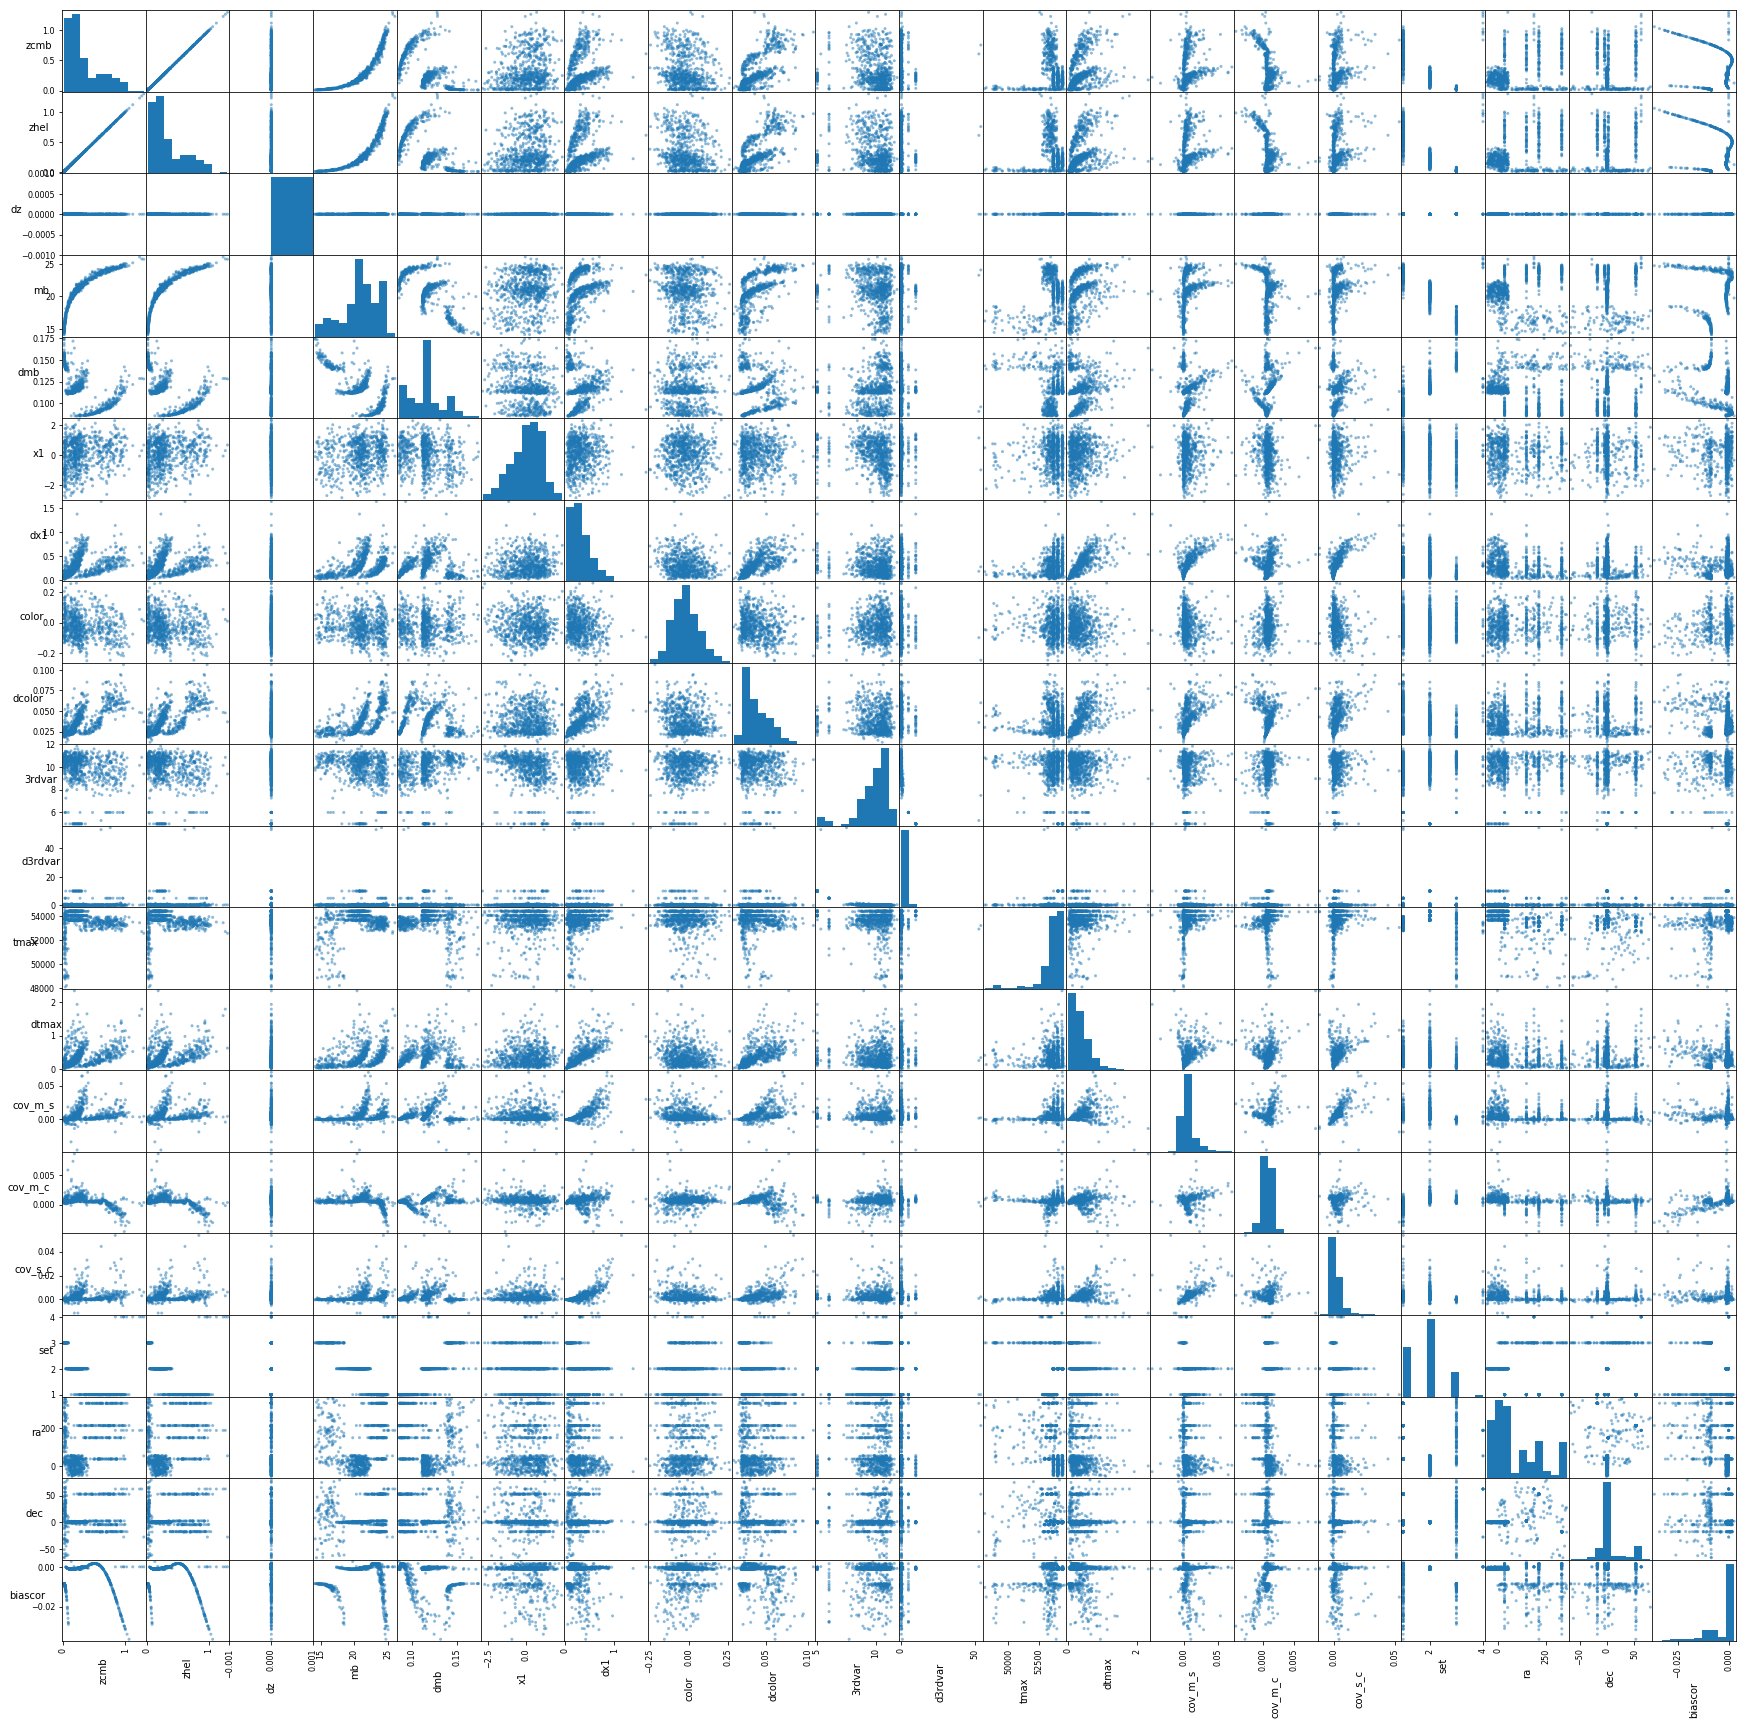

In [52]:
axs = pd.plotting.scatter_matrix(jla, figsize=(30,30));
for x in range(len(axs)):
    for y in range(len(axs)):
        if x == len(axs) - 1:
            axs[x, y].xaxis.label.set_rotation(90)
        if y == 0:    
            axs[x, y].yaxis.label.set_rotation(0)

###**Figure 1:** Scatter matrix of relationships between each of the variables found in the data from jla_lcparams.txt

##Deliverable 3 - Plot Zcmb v.s. Mb

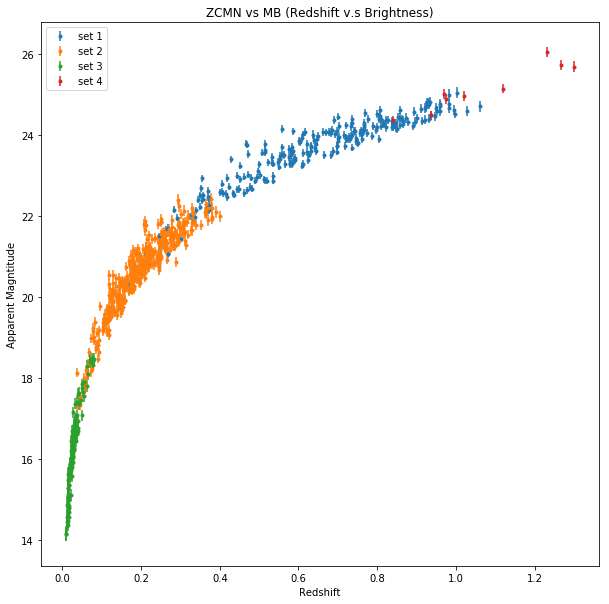

In [53]:
pl.figure(figsize =(10, 10))

for i in range(1,5):
  pl.errorbar(jla.zcmb[jla.set == i], jla.mb[jla.set == i], yerr= jla.dmb[jla.set == i], fmt= '.' )
pl.xlabel('Redshift')
pl.ylabel('Apparent Magntitude')
pl.title('ZCMN vs MB (Redshift v.s Brightness)')
pl.legend(['set 1','set 2','set 3','set 4'])

###**Figure 2:** Scatter plot of the Zcmb v.s Mb data. Each data point has y-dimension error bars, which was obtained the dmb variable. The legend indicates the set from which the data was taken. when the data is plotted in this manner the relationship looks somewhat logrithmic.


##Deliverable 4 - Plot Zcmb v.s Log10(Mb)

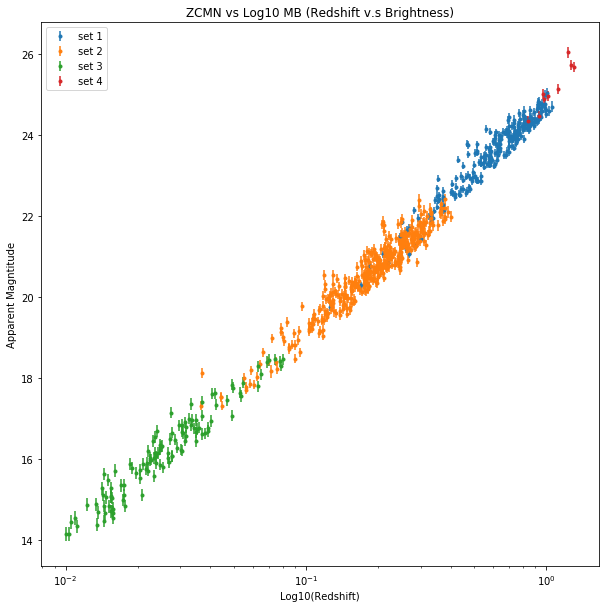

In [122]:
pl.figure(figsize =(10, 10))

for i in range(1,5):
  pl.errorbar(jla.zcmb[jla.set == i], jla.mb[jla.set == i], yerr= jla.dmb[jla.set == i], fmt= '.' )
pl.xlabel('Log10(Redshift)')
pl.xscale('log')
pl.ylabel('Apparent Magntitude')
pl.title('ZCMN vs Log10 MB (Redshift v.s Brightness)')
pl.legend(['set 1','set 2','set 3','set 4'])

###**Figure 3:** Scatter plot of the Zcmb v.s log10(Mb) data. Each data point has y-dimension error bars, which was obtained the dmb variable. The legend indicates the set from which the data was taken. In the manner that the data is plotted, the relationship now looks somewhat linear. 

# Fit a line to the data with scipy

For each model you fit below you should make a plot of the data and the model. Consider your fit to the data with the uncertainties your "baseline fit"

Like we did in class: fit a line using ```scipy.optimize``` (lab 5). Do it without and with the uncertainties on your _y_ data (the ```curvefit``` argument to include uncertainties in the endogenous variable is ```sigma```). Report the variace and the covariance by printing your mode uncertainties explicitly as below:





##Deliverable 4 - fuction logline and variance & covariance

In [0]:
def logline(x, a, b):
  '''
  Parameters:
  a->int value, slope of the line
  b->int value, y-intercept of the line
  x-> array of x values
  '''
  return a * np.log10(x) + b

In [0]:
popt, pcov = sp.optimize.curve_fit(logline, jla.zcmb, jla.mb, p0=[6,14])

In [125]:
print("slope: {:.1f} +/- {:.3f} \nintercept: {:.1f} +/- {:.3f} \nparameters covariance: {:.5f}".format(popt[0],pcov[0][0]**0.5,popt[1],pcov[1][1]**0.5,pcov[0][1]))




slope: 5.4 +/- 0.022 
intercept: 24.7 +/- 0.019 
parameters covariance: 0.00035


In [0]:
sorting =  np.argsort(jla.zcmb)

plot the data like you did above and the model you just created including the uncertainty band (look at lab5: there is a mistake we made in class which I corrected in the version I uploaded)

##Deliverable 5 - Plot with Error shading over line fit

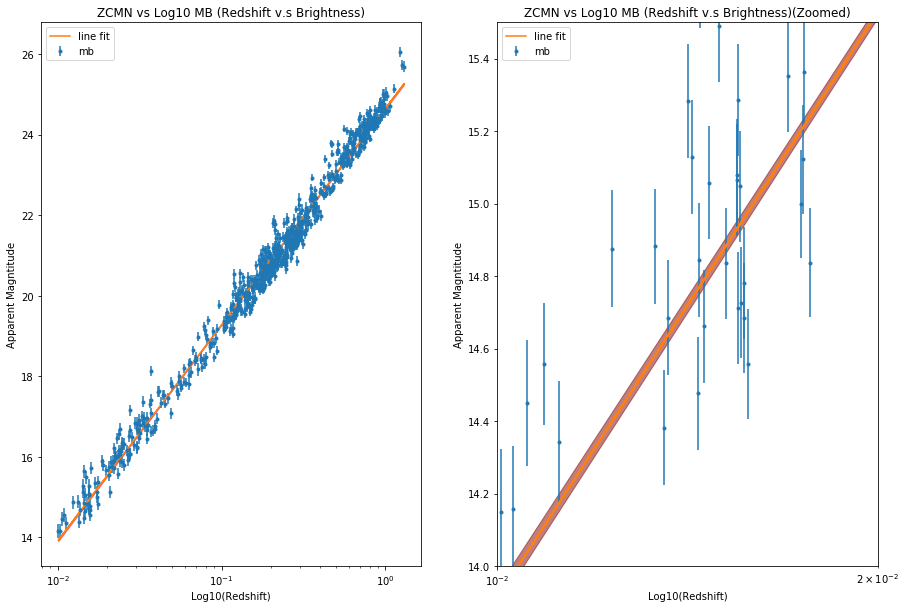

In [61]:
pl.figure(figsize=(15,10))
pl.subplot(121)
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")
pl.plot(jla.zcmb, logline(jla.zcmb, popt[0], popt[1]), "-")
pl.legend(['line fit','mb'])

pl.fill_between(jla.zcmb[sorting],
                 logline(jla.zcmb[sorting], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                 logline(jla.zcmb[sorting], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5),color='crimson',alpha=0.5)
pl.xscale('log')
pl.title("ZCMN vs Log10 MB (Redshift v.s Brightness)")
pl.xlabel('Log10(Redshift)')
pl.ylabel('Apparent Magntitude');


pl.subplot(122)
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")
pl.plot(jla.zcmb, logline(jla.zcmb, popt[0], popt[1]), "-")
pl.legend(['line fit','mb'])

pl.fill_between(jla.zcmb[sorting],
                 logline(jla.zcmb[sorting], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                 logline(jla.zcmb[sorting], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5),color='maroon',alpha=0.5)
pl.xscale('log')
pl.title("ZCMN vs Log10 MB (Redshift v.s Brightness)(Zoomed)")

pl.xlabel('Log10(Redshift)')
pl.ylabel('Apparent Magntitude');
pl.ylim((14,15.5))
pl.xlim((.01,.02))
pl.show()


###**Figure 4 and 5:** (4) Scatter plot of the Zcmb v.s log10(Mb) data, with a line fit to the data. Each data point has y-dimension error bars, which was obtained the dmb variable. The legend indicates the the mb data and the line fit. (5) Zoomed version of figure 4, for the purpose of showing the scale of the filled region over the line fit. this shaded region is very small which means that the data has relatively small error.

##Deliverable 6 - plot with line fit including and not including error

In [0]:
peopt, pecov = sp.optimize.curve_fit(logline, jla.zcmb, jla.mb, p0=[6,14], sigma = jla.dmb)

In [63]:
peopt

array([ 5.42599016, 24.6961156 ])

In [64]:
pecov

array([[0.000604  , 0.00035954],
       [0.00035954, 0.00032853]])

(0.01, 0.02)

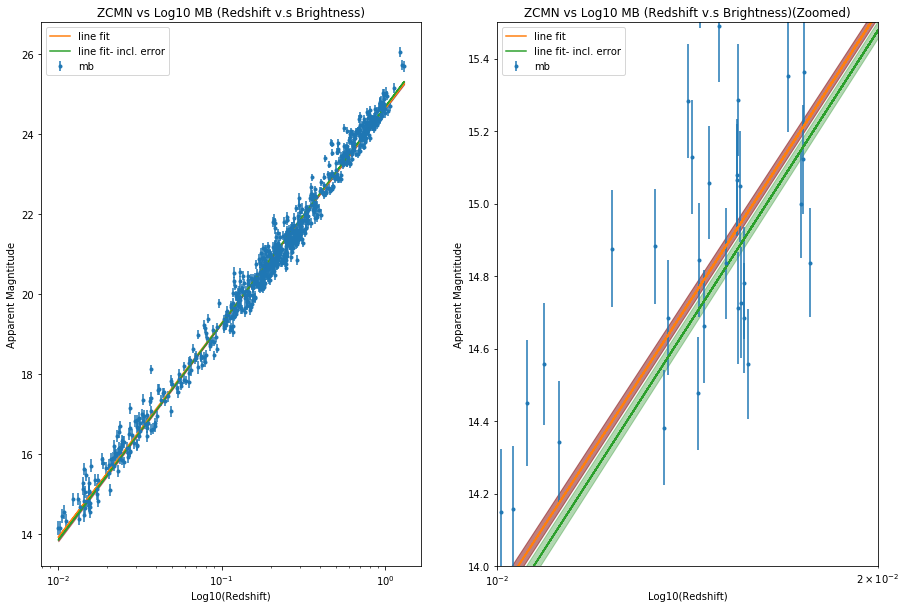

In [66]:
pl.figure(figsize=(15,10))
pl.subplot(121)
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")
pl.plot(jla.zcmb, logline(jla.zcmb, popt[0], popt[1]), "-")
pl.plot(jla.zcmb, logline(jla.zcmb, peopt[0], peopt[1]), "-")
pl.legend(['line fit', 'line fit- incl. error','mb'])

pl.fill_between(jla.zcmb[sorting],
                 logline(jla.zcmb[sorting], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                 logline(jla.zcmb[sorting], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5),color='maroon',alpha=0.5)
pl.fill_between(jla.zcmb[sorting],
                 logline(jla.zcmb[sorting], peopt[0] + pecov[0][0]**0.5, peopt[1] + pecov[1][1]**0.5),
                 logline(jla.zcmb[sorting], peopt[0] - pecov[0][0]**0.5, peopt[1] - pecov[1][1]**0.5),color='maroon',alpha=0.5)
pl.xscale('log')
pl.title("ZCMN vs Log10 MB (Redshift v.s Brightness)")
pl.xlabel('Log10(Redshift)')
pl.ylabel('Apparent Magntitude');


#following is for the zoomed in plot to show the shaded region, 
#which is the "error bar" of the line fit
pl.subplot(122)
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")
pl.plot(jla.zcmb, logline(jla.zcmb, popt[0], popt[1]), "-")
pl.plot(jla.zcmb, logline(jla.zcmb, peopt[0], peopt[1]), "-")
pl.legend(['line fit', 'line fit- incl. error','mb'])

pl.fill_between(jla.zcmb[sorting],
                 logline(jla.zcmb[sorting], popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                 logline(jla.zcmb[sorting], popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5),
                 color='maroon',alpha=0.5)
pl.fill_between(jla.zcmb[sorting],
                 logline(jla.zcmb[sorting], peopt[0] + pecov[0][0]**0.5, peopt[1] + pecov[1][1]**0.5),
                 logline(jla.zcmb[sorting], peopt[0] - pecov[0][0]**0.5, peopt[1] - pecov[1][1]**0.5),
                 color='green',alpha=0.3)
pl.xscale('log')
pl.title("ZCMN vs Log10 MB (Redshift v.s Brightness)(Zoomed)")
pl.xlabel('Log10(Redshift)')
pl.ylabel('Apparent Magntitude');
pl.ylim((14,15.5))
pl.xlim((.01,.02))

###**Figure 6 and 7:** (6) Scatter plot of the Zcmb v.s log10(Mb) data, with two line fits to the data (one with and one without consideration of error bars. Each data point has y-dimension error bars, which was obtained the dmb variable. The legend indicates the the mb data and the line fits with and with out error considered. (7) Zoomed version of figure 6, for the purpose of showing the scale of the filled region over the line fit. this shaded regions are very small which means that the data has relatively small error.

##Deiverable 7 - comparison of the two models

In [123]:
print('if', np.abs(popt[0]-peopt[0]), '≤', 3*(pcov[0][0]+pecov[0][0])**0.5, 
      'the slope including error is a better fit to the data')
print('if', np.abs(popt[1]-peopt[1]), '≤', 3*(pcov[1][1]+pecov[1][1])**0.5, 
      'the intercept including error is a better fit to the data')

if 0.05393532980747473 ≤ 0.09945019635768552 the slope including error is a better fit to the data
if 0.03988506943057857 ≤ 0.07875162090517157 the intercept including error is a better fit to the data


Now fit the data using only 1 every 20 points - use this: https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array

Plot the new model and its uncertainty band and comment on the model: how do the three models compare?

##Deliverable 8 - using 1 in every 20 points to fit

Text(0.5, 1.0, 'ZCMN vs Log10 MB - Sliced Data')

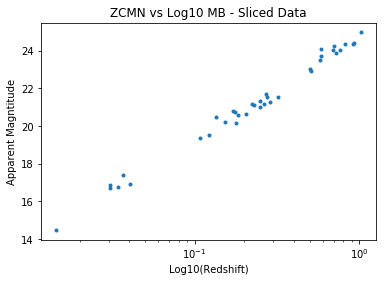

In [67]:
slicex = jla.zcmb[0::20]
slicey = jla.mb[0::20]

pl.plot(slicex,slicey,'.')
pl.xscale('log')
pl.xlabel('Log10(Redshift)')
pl.ylabel('Apparent Magntitude')
pl.title('ZCMN vs Log10 MB - Sliced Data')

**Figure 8:** Scatter plot of the Zcmb v.s log10(Mb) data, but only using 1 in every 20 points. 

In [129]:
poptS, pcovS = sp.optimize.curve_fit(logline, slicex, slicey)
print("poptS:",poptS,'\n',"pcoveS:",pcovS)

poptS: [ 5.42105772 24.67804949] 
 pcoveS: [[0.01000833 0.00640421]
 [0.00640421 0.00637401]]


##Deliverable 9 - Plot of the data with a line fit based on 1 in every 20 data points

Text(0.5, 1.0, 'ZCMN vs Log10 MB - Line Fit to Sliced Data')

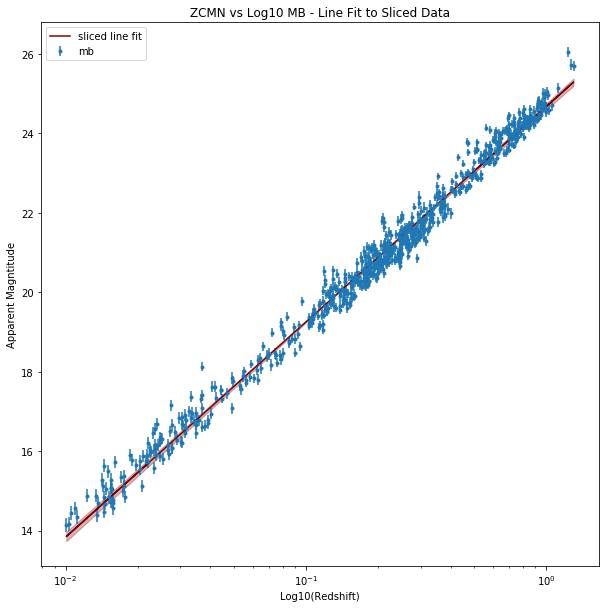

In [82]:
pl.figure(figsize=(10,10))
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")
pl.plot(jla.zcmb, logline(jla.zcmb, poptS[0], poptS[1]), "r", c='maroon')
pl.legend(['sliced line fit', 'mb'])

pl.fill_between(jla.zcmb[sorting],
                 logline(jla.zcmb[sorting], poptS[0] + pcovS[0][0]**0.5, poptS[1] + pcovS[1][1]**0.5),
                 logline(jla.zcmb[sorting], poptS[0] - pcovS[0][0]**0.5, poptS[1] - pcovS[1][1]**0.5),
                 color='maroon',alpha=0.3)

pl.xscale('log')
pl.xlabel('Log10(Redshift)')
pl.ylabel('Apparent Magntitude')
pl.title("ZCMN vs Log10 MB - Line Fit to Sliced Data")


###**Figure 9:** Scatter plot of the Zcmb v.s log10(Mb) data, with the line fit using sliced data. Each data point has y-dimension error bars, which was obtained the dmb variable. The legend indicates the the mb data and the line fit.

# Fit a quadratic equation

Use the same function ```curve_fit()``` to fit a quadratic equation to the data. 
The equation is below

Plot your data, your original model which included uncertainties, and the current quadratic model


##Deliverable 10 - fitting curve_fit and quadratic to the data

In [0]:
def logquad(x, a, b, c):
    '''Quadratic equation
    Input:
    x: array-like, the exogenous variable
    a: parameters of the quadratic term
    b: parameter of the linear term
    c: intercept
    
    '''
    return a * np.log10(x)**2 + b * np.log10(x) + c


In [131]:
qpopt, qpcov = sp.optimize.curve_fit(logquad, jla.zcmb, jla.mb, p0=[2,2,2], sigma=jla.dmb)

print('optimized constants:',qpopt, '\n','covarience matrix:', qpcov)

optimized constants: [ 0.34823138  5.98460083 24.83923112] 
 covarience matrix: [[0.00172315 0.00276417 0.00070818]
 [0.00276417 0.00498621 0.00146466]
 [0.00070818 0.00146466 0.00059134]]


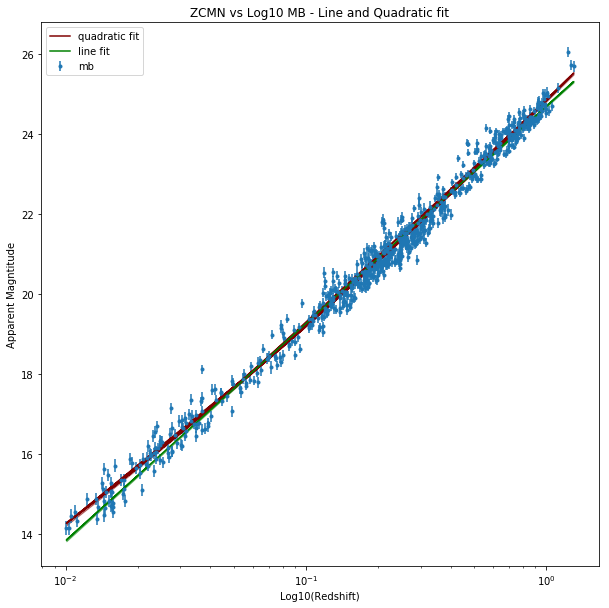

In [83]:
pl.figure(figsize=(10,10))

pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")
pl.plot(jla.zcmb, logquad(jla.zcmb, qpopt[0], qpopt[1], qpopt[2]), "-", c='maroon')
pl.plot(jla.zcmb, logline(jla.zcmb, peopt[0], peopt[1]), "-", c='green')
pl.legend(['quadratic fit', 'line fit', 'mb'])
pl.fill_between(jla.zcmb[sorting],
                 logquad(jla.zcmb[sorting], qpopt[0] + qpcov[0][0]**0.5, qpopt[1] + qpcov[1][1]**0.5, qpopt[2] + qpcov[2][2]**0.5),
                 logquad(jla.zcmb[sorting], qpopt[0] - qpcov[0][0]**0.5, qpopt[1] - qpcov[1][1]**0.5, qpopt[2] - qpcov[2][2]**0.5),
                color='maroon',alpha=0.5)


pl.fill_between(jla.zcmb[sorting],
                 logline(jla.zcmb[sorting], peopt[0] + pecov[0][0]**0.5, peopt[1] + pecov[1][1]**0.5),
                 logline(jla.zcmb[sorting], peopt[0] -pecov[0][0]**0.5, peopt[1] - pecov[1][1]**0.5),
                 color='green',alpha=0.5)

pl.xscale('log')
pl.xlabel('Log10(Redshift)')
pl.ylabel('Apparent Magntitude')
pl.title("ZCMN vs Log10 MB - Line and Quadratic fit");

###**Figure 10:** Scatter plot of the Zcmb v.s log10(Mb) data, with the line fit and a quadratic fit to the data. Each data point has y-dimension error bars, which was obtained the dmb variable. The legend indicates the the mb data, the line fit, and the quadratic fit. Visually both the quadratic and the line fit seem to be good fits for the data. 

# Now fit the data with sklearn 
like we did in class (lab 5): create a regressor linear model and fit the data to it. Predict the y values based on the input data. Make the usual plot of data and model including your baseline model with scipy

##Deliverable 11- fitting data with SKlearn

In [87]:
regr = skl.linear_model.LinearRegression()
regr.fit(np.atleast_2d(np.log10(jla.zcmb)).T, jla.mb)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

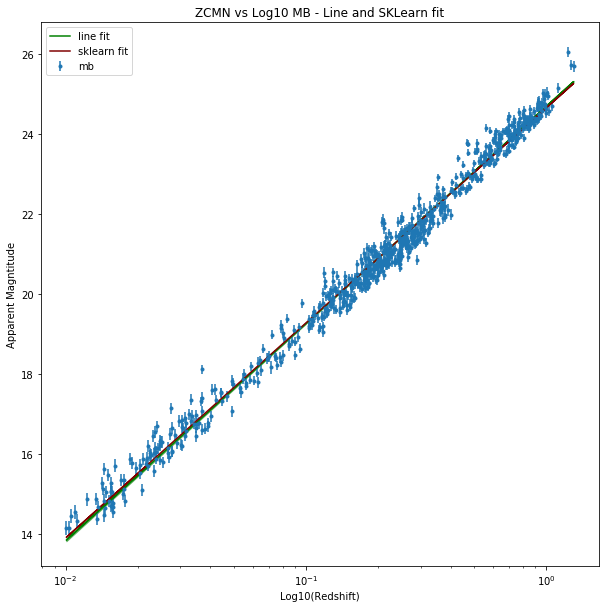

In [104]:
pl.figure(figsize=(10,10))
pl.errorbar(jla.zcmb, jla.mb, yerr = jla.dmb, fmt=".")
pl.plot(jla.zcmb, logline(jla.zcmb, peopt[0], peopt[1]), "-", c='green')
pl.plot(jla.zcmb, regr.predict(np.atleast_2d(np.log10(jla.zcmb)).T), '-', c= 'maroon')
pl.legend(['line fit','sklearn fit','mb'])

pl.fill_between(jla.zcmb[sorting],
                 logline(jla.zcmb[sorting], peopt[0] + pecov[0][0]**0.5, peopt[1] + pecov[1][1]**0.5),
                 logline(jla.zcmb[sorting], peopt[0] - pecov[0][0]**0.5, peopt[1] - pecov[1][1]**0.5),
                 color='green',alpha=0.5)

pl.xscale('log')
pl.xlabel('Log10(Redshift)')
pl.ylabel('Apparent Magntitude')
pl.title("ZCMN vs Log10 MB - Line and SKLearn fit");

###**Figure 11:** Scatter plot of the Zcmb v.s log10(Mb) data, with the line fit, using curve_fit, and a line fit, using sklearn, to the data. Each data point has y-dimension error bars, which was obtained the dmb variable. The legend indicates the the mb data, the line fit, and the sklearn fit. you can see that the two line fits are very similar but do deviate from each other slightly. Visually both the sklearn and the curve_fit fit seem to be good fits for the data. 

# Cross valudation: Split your data into a training and test set
this is the "signature" of the machine learning approach. While this can be done using simply a random number generator
(see example)

do it using the sklear capabilities: ```skl.model_selection.train_test_split```. Read abnout the ```stratify``` funcionality of this method: it allows you to create unbiased train-test samples. In this case it is not necessary but it may be useful in your future!


##Deliverable 12 

In [0]:
#instead use sklern to split
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(np.log10(jla.zcmb), jla.mb, test_size = 0.25, train_size = 0.75)

In [117]:
regr1 = skl.linear_model.LinearRegression()
regr1.fit(np.atleast_2d(x_train).T, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

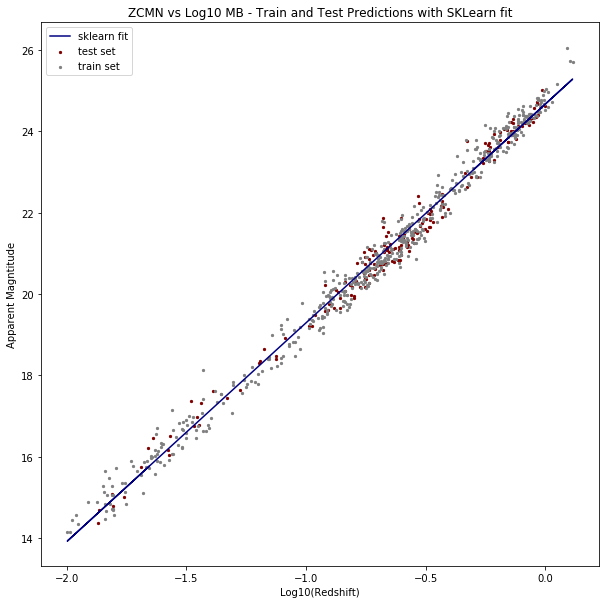

In [118]:
pl.figure(figsize = (10,10))

pl.scatter(x_test, y_test, s = 5, color = 'maroon')
pl.scatter(x_train, y_train, s = 5, color = 'gray')

pl.plot(np.log10(jla.zcmb), regr1.predict(np.atleast_2d(np.log10(jla.zcmb)).T), '-', c='navy')


pl.legend(['sklearn fit','test set','train set']);
pl.xlabel('Log10(Redshift)')
pl.ylabel('Apparent Magntitude')
pl.title("ZCMN vs Log10 MB - Train and Test Predictions with SKLearn fit");

###**Figure 12:** Above is the scartter plot of the test and training sets of the split data, with a line fit using sklearn. The legend indicates the points that belong to which split data set, and the line fit. 

##Deliverable 13 -comparison

In [130]:
print("Score for training set: ", np.round(regr1.score(np.atleast_2d(x_train).T, y_train), 4))
print("Score for test set: ", np.round(regr1.score(np.atleast_2d(x_test).T, y_test), 4))

Score for training set:  0.9881
Score for test set:  0.9847


The **test set has a higher score** so it is a better fit to the SKLearn model.